<a href="https://colab.research.google.com/github/maulitayasmin/Machine-Learning-TI-3E-2024/blob/main/Week7_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Nama : Maulita Yasmin Nadila
* Kelas : 3E
* NIM : 2241720010  
* Absen : 18

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [ ]:
def convolution2d(image, kernel, stride, padding):

  # Mendapatkan dimensi gambar dan kernel
  image_height, image_width = image.shape[:2]
  kernel_height, kernel_width = kernel.shape[:2]

  # Menghitung dimensi gambar output
  output_height = int(((image_height - kernel_height + 2 * padding) / stride) + 1)
  output_width = int(((image_width - kernel_width + 2 * padding) / stride) + 1)

  # Membuat gambar output dengan nilai 0
  output_image = np.zeros((output_height, output_width))

  # Menambahkan padding pada gambar input
  padded_image = np.pad(image, ((padding, padding), (padding, padding)), 'constant')

  # Melakukan konvolusi
  for y in range(0, output_height):
    for x in range(0, output_width):
      # Mendapatkan potongan gambar yang sesuai dengan kernel
      image_patch = padded_image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width]

      # Menghitung hasil konvolusi
      output_image[y, x] = np.sum(image_patch * kernel)

  return output_image

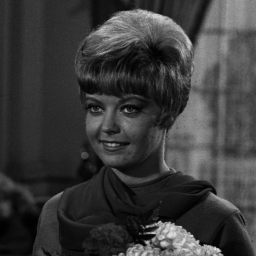

In [ ]:
img = cv.imread("/content/drive/MyDrive/PCVK/Images/female.tiff")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

In [ ]:
#image sharpen
kernel_sharpening = np.array([[0,-1,0],
                              [-1, 5,-1],
                              [0,-1,0]])

In [ ]:
convolution2d(img_gray, kernel_sharpening,1,2)

array([[   0.,  -47.,  -42., ..., -134., -131.,    0.],
       [ -47.,  145.,   75., ...,  273.,  385., -131.],
       [ -48.,  105.,   47., ...,  131.,  287., -136.],
       ...,
       [  -9.,   11.,   15., ...,   98.,  227., -102.],
       [ -18.,   64.,   40., ...,  130.,  305.,  -96.],
       [   0.,  -18.,  -17., ...,  -73.,  -96.,    0.]])

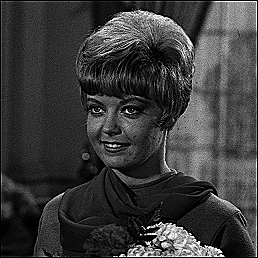

In [ ]:
cv2_imshow(convolution2d(img_gray, kernel_sharpening,1,2))

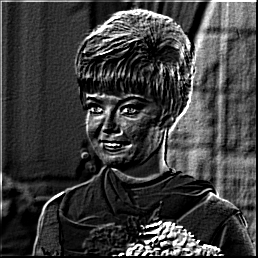

In [ ]:
#image emboss
kernel_emboss = np.array([[-2,-1,0],
                          [-1, 1,1],
                          [0, 1,2]])

cv2_imshow(convolution2d(img_gray, kernel_emboss, 1, 2))

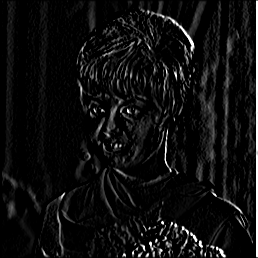

In [ ]:
#image Left Sobel Edge Detection
kernel_lsed = np.array([[1, 0, -1],
                        [2, 0, -2],
                        [1, 0, -1]])

cv2_imshow(convolution2d(img_gray, kernel_lsed, 1, 2))

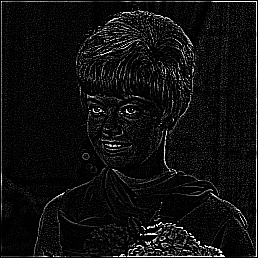

In [ ]:
#image Canny Edge Detection
kernel_ced = np.array([[-1, -1, -1],
                       [-1, 8, -1],
                       [-1, -1, -1]])

cv2_imshow(convolution2d(img_gray, kernel_ced, 1, 2))

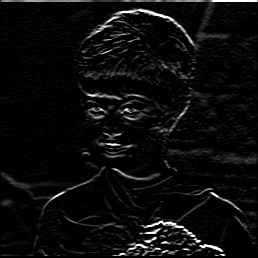

In [ ]:
#image Prewitt Edge Detection
kernel_ped = np.array([[-1, -1, -1],
                       [0, 0, 0],
                       [1, 1, 1]])

cv2_imshow(convolution2d(img_gray, kernel_ped, 1, 2))

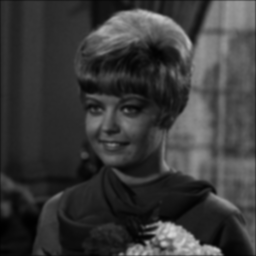

In [ ]:
#image 5x5 Gaussian Blur
kernel_5gb = np.array ([[1, 4, 6, 4, 1],
                       [4, 16, 24, 16, 4],
                       [6, 24, 36, 24, 6],
                       [4, 16, 24, 16, 4],
                       [1, 4, 6, 4, 1]]) / 256

cv2_imshow(convolution2d(img_gray, kernel_5gb, 1, 2))

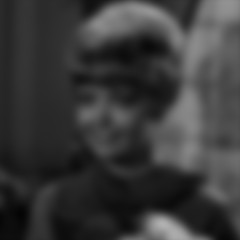

In [ ]:
#image 21x21 Gaussian Blur
kernel_size = 21
sigma=math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

In [ ]:
import os  # Mengimpor modul os untuk berinteraksi dengan sistem operasi, seperti membaca dan menulis file serta mengelola direktori.
import cv2 as cv  # Mengimpor modul OpenCV untuk pengolahan gambar, menggunakan alias 'cv' untuk kemudahan akses.
import matplotlib.pyplot as plt  # Mengimpor modul Matplotlib untuk visualisasi data, khususnya untuk menampilkan gambar dan grafik.
import numpy as np  # Mengimpor modul NumPy untuk operasi matematis dan manipulasi array, yang sering digunakan dalam pengolahan gambar.

In [ ]:
def adjust_brightness(image, value):
    # Mengonversi gambar dari format BGR ke format HSV
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

    # Memisahkan channel H (Hue), S (Saturation), dan V (Value) dari gambar HSV
    h, s, v = cv.split(hsv)

    # Menambahkan nilai 'value' ke channel V untuk mengubah kecerahan
    v = cv.add(v, value)

    # Menjaga nilai channel V tetap dalam rentang valid (0-255)
    v = np.clip(v, 0, 255)

    # Menggabungkan kembali channel H, S, dan V menjadi gambar HSV yang baru
    hsv = cv.merge((h, s, v))

    # Mengonversi gambar dari format HSV kembali ke format BGR dan mengembalikannya
    return cv.cvtColor(hsv, cv.COLOR_HSV2BGR)

In [ ]:
# Mendefinisikan kernel untuk memperjelas (sharpen) gambar
sharpen_kernel = np.array([
    [0, -1, 0],   # Tidak ada pengaruh dari pixel di atas dan bawah pixel pusat
    [-1, 5, -1],  # Mengurangi kontribusi pixel tetangga (atas dan bawah), meningkatkan pixel pusat
    [0, -1, 0]    # Tidak ada pengaruh dari pixel di atas dan bawah pixel pusat
])

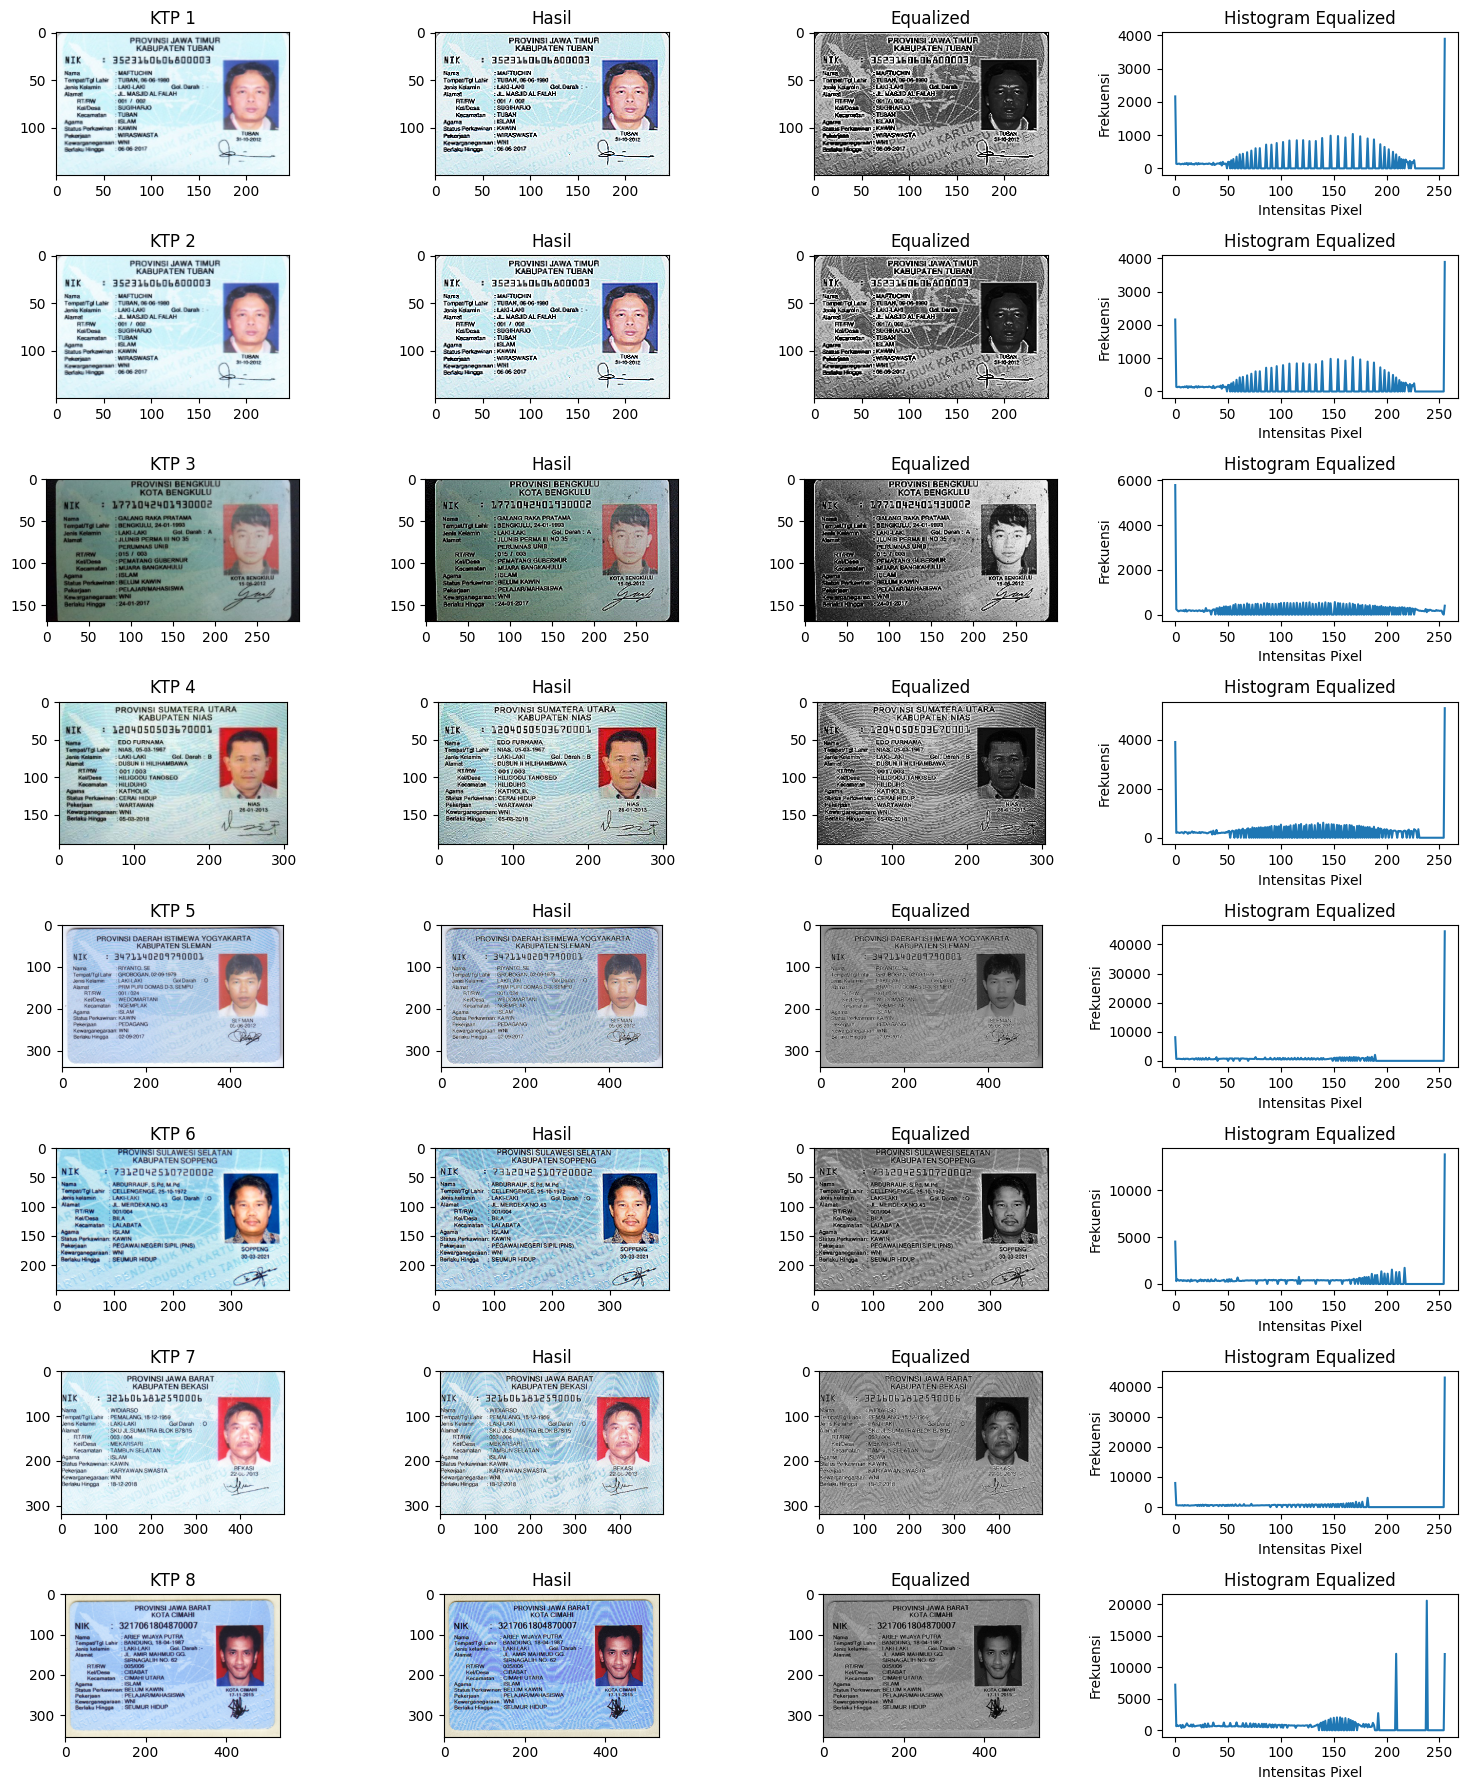

In [ ]:
# Mengambil daftar file gambar dari direktori KTP_More yang berformat .png, .jpg, atau .jpeg
ktp = [file for file in os.listdir('/content/drive/MyDrive/PCVK/Images/KTP_More') if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Menghitung jumlah baris (jumlah gambar) dan menentukan jumlah kolom untuk subplot
num_rows = len(ktp)
num_cols = 4

# Membuat subplot dengan ukuran yang ditentukan
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 18))

# Mengiterasi melalui setiap file KTP untuk memproses dan menampilkan gambar
for i, ktp_file in enumerate(ktp):
    # Menggabungkan path direktori dengan nama file untuk mendapatkan path lengkap
    ktp_path = os.path.join('/content/drive/MyDrive/PCVK/Images/KTP_More', ktp_file)

    # Membaca gambar menggunakan OpenCV
    ktp_image = cv.imread(ktp_path)

    # Mengubah ukuran gambar menjadi setengah dari ukuran aslinya
    ktp_image_resized = cv.resize(ktp_image, (0, 0), fx=0.5, fy=0.5)

    # Menyesuaikan kecerahan gambar dengan mengurangi 10 unit dari channel V
    brightness_adjusted = adjust_brightness(ktp_image_resized, -10)

    # Menggunakan filter konvolusi untuk memperjelas gambar
    sharpened = cv.filter2D(brightness_adjusted, -1, sharpen_kernel)

    # Mengonversi gambar sharpened ke format grayscale
    sharpened_gray = cv.cvtColor(sharpened, cv.COLOR_BGR2GRAY)

    # Melakukan histogram equalization pada gambar grayscale untuk meningkatkan kontras
    equalized = cv.equalizeHist(sharpened_gray)

    # Mengonversi gambar equalized kembali ke format BGR
    equalized_color = cv.cvtColor(equalized, cv.COLOR_GRAY2BGR)

    # Menampilkan gambar asli yang telah diubah ukurannya pada subplot
    axs[i, 0].imshow(cv.cvtColor(ktp_image_resized, cv.COLOR_BGR2RGB))
    axs[i, 0].set_title(f'KTP {i+1}')  # Menambahkan judul untuk gambar asli

    # Menampilkan gambar yang telah diperjelas pada subplot
    axs[i, 1].imshow(cv.cvtColor(sharpened, cv.COLOR_BGR2RGB))
    axs[i, 1].set_title(f'Hasil')  # Menambahkan judul untuk gambar yang diperjelas

    # Menampilkan gambar yang telah dilakukan histogram equalization pada subplot
    axs[i, 2].imshow(cv.cvtColor(equalized_color, cv.COLOR_BGR2RGB))
    axs[i, 2].set_title(f'Equalized')  # Menambahkan judul untuk gambar equalized

    # Menghitung histogram dari gambar equalized
    hist_equalized = cv.calcHist([equalized], [0], None, [256], [0, 256])

    # Menampilkan histogram pada subplot
    axs[i, 3].plot(hist_equalized)
    axs[i, 3].set_title(f'Histogram Equalized')  # Menambahkan judul untuk histogram
    axs[i, 3].set_xlabel('Intensitas Pixel')  # Label sumbu x
    axs[i, 3].set_ylabel('Frekuensi')  # Label sumbu y

# Mengatur layout subplot agar tidak saling bertumpuk
plt.tight_layout()
# Menampilkan semua subplot
plt.show()